In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [51]:
csv_data_file= r"D:\1-MYSELF\2-Project\programming\Csv_flie\count_bicycle\train.csv"
count_bicycle= pd.read_csv(csv_data_file)

In [52]:
count_bicycle.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [53]:
count_bicycle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [54]:
count_bicycle.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [55]:
count_bicycle["datetime"]= pd.to_datetime(count_bicycle["datetime"], errors="coerce")
count_bicycle["year"]= count_bicycle["datetime"].dt.year
count_bicycle["month"]= count_bicycle["datetime"].dt.month
count_bicycle["day"]= count_bicycle["datetime"].dt.day
count_bicycle["hour"]= count_bicycle["datetime"].dt.hour
count_bicycle.drop(["datetime", "casual", "registered"], axis=1, inplace=True)

for col in count_bicycle:
    try:
        count_bicycle[col]= count_bicycle[col].astype(float)
    except Exeption as e:
        print(f"your error is: {e}")

<Axes: >

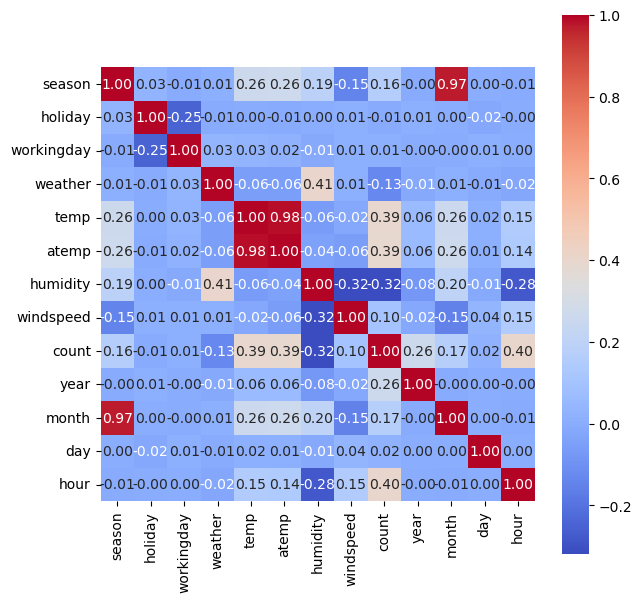

In [56]:
corr=  count_bicycle.corr()
plt.figure(figsize=(7,7))
sns.heatmap(corr, cbar= True, square= True, fmt=".2f", annot= True, annot_kws={"size":10}, cmap="coolwarm")

In [57]:
cfd= count_bicycle[["season", "holiday", "workingday", "weather", "temp", "atemp", "humidity", "windspeed", "year", "month", "day", "count"]]
X= np.asanyarray(cfd.drop(["count"], axis=1))
Y= np.asanyarray(cfd[["count"]])

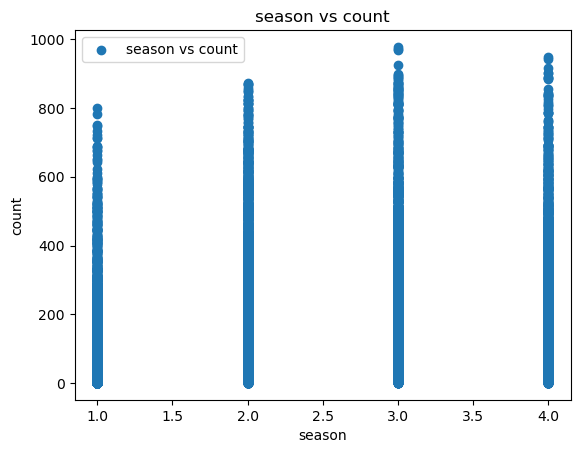

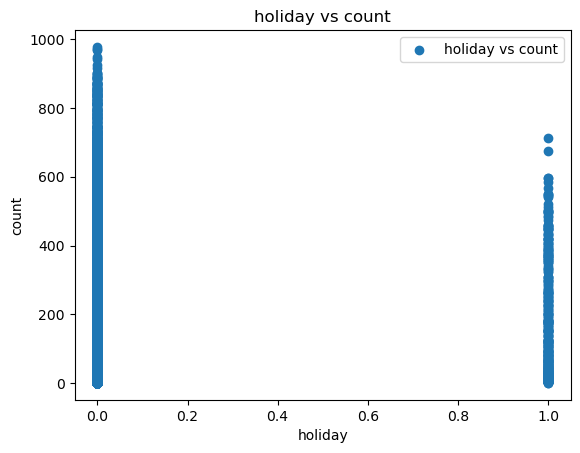

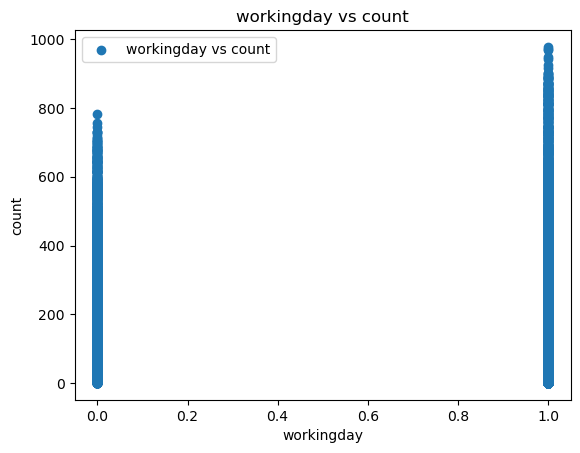

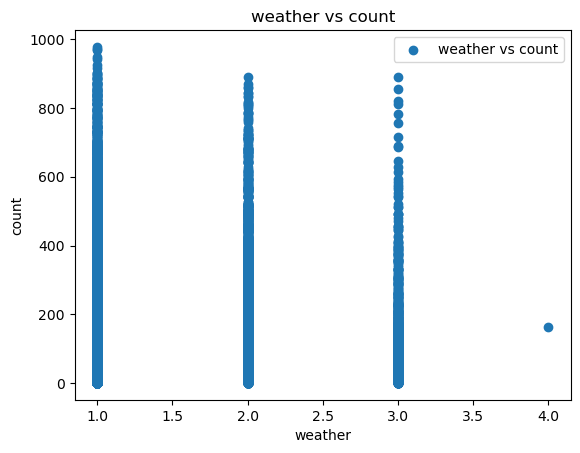

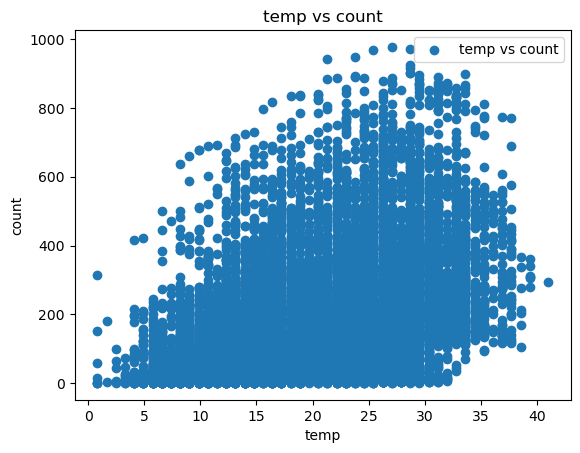

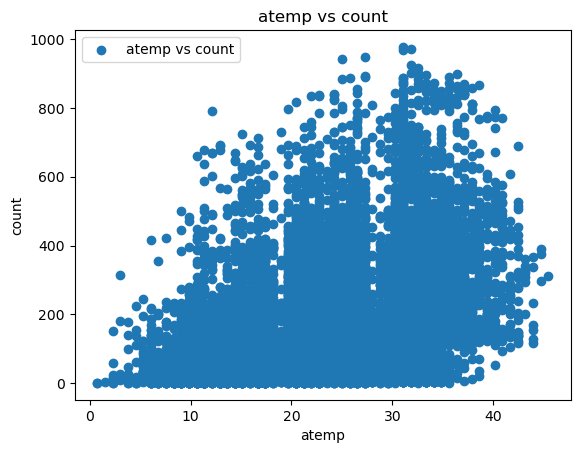

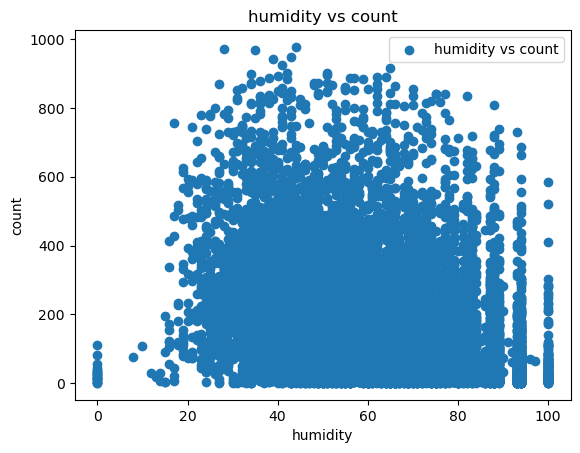

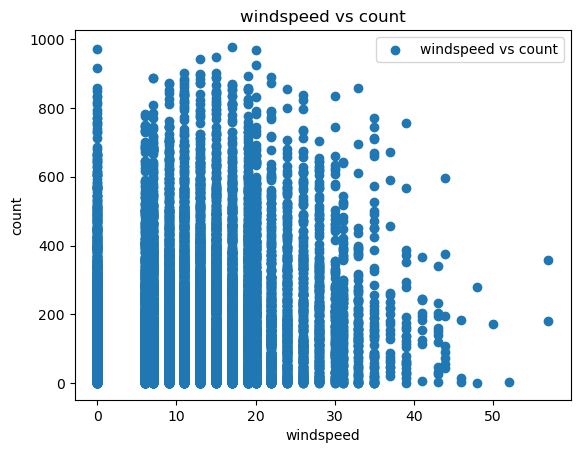

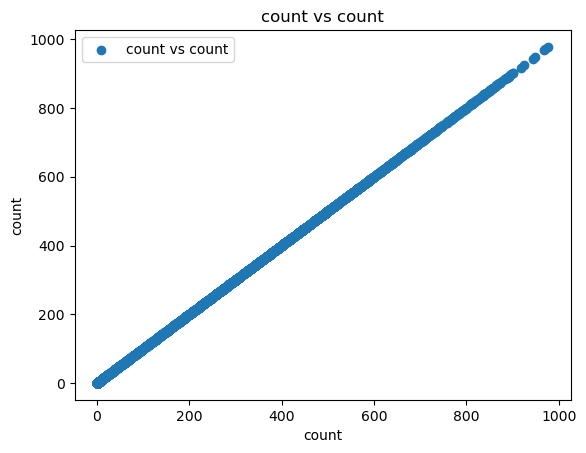

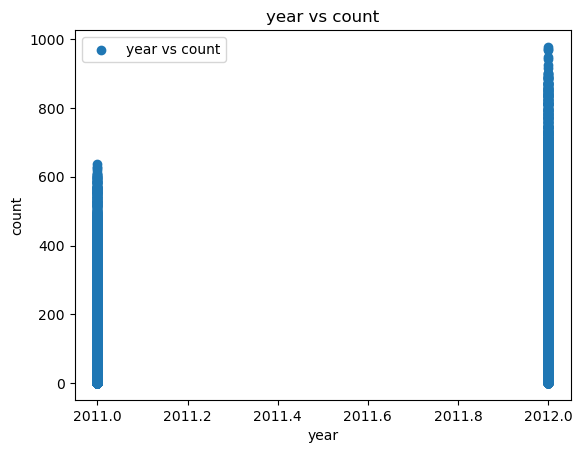

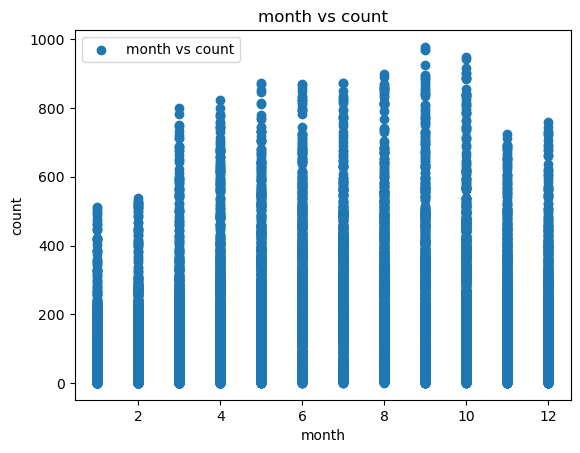

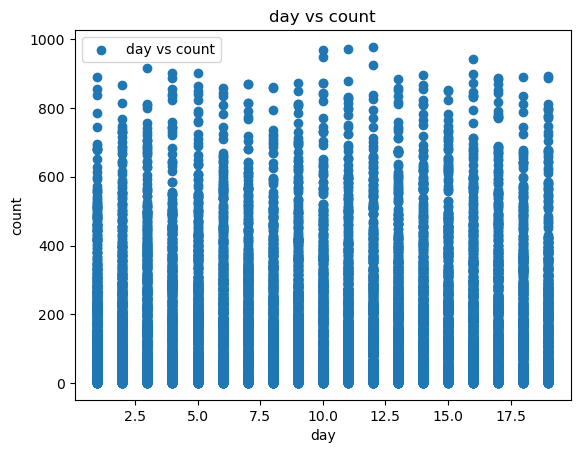

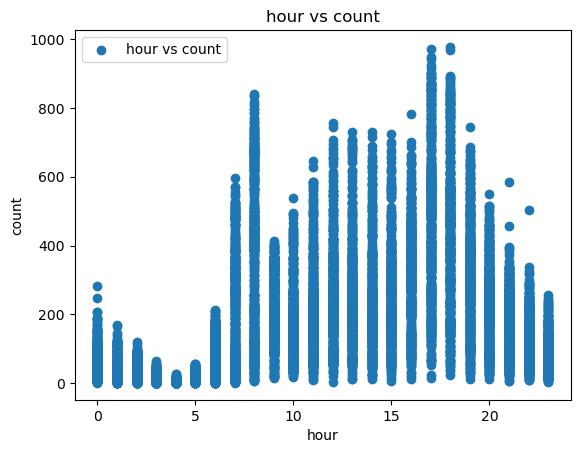

In [58]:
for column in count_bicycle.columns:
    plt.figure()
    plt.scatter(count_bicycle[column], Y, label= f"{column} vs count")
    plt.xlabel(column)
    plt.ylabel("count")
    plt.title(f"{column} vs count")
    plt.legend()
    plt.show()

In [66]:
Ss= StandardScaler()
X= Ss.fit_transform(X)
Y= Ss.fit_transform(Y)

x_train, x_test, y_train, y_test= train_test_split(X,Y, test_size=0.2, random_state=4)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(8708, 11) (2178, 11) (8708, 1) (2178, 1)


### LinearRegression:

In [67]:
mlr= LinearRegression()
mlr.fit(x_train,y_train)
print("coef: ", mlr.coef_)
print("intersept: ", mlr.intercept_)

coef:  [[-8.24396127e-02  7.95701169e-04  2.76363597e-05  1.37408838e-02
   3.19559363e-02  2.93329227e-01 -3.03366967e-01  4.30628525e-02
   2.15160721e-01  2.32015014e-01  6.23719513e-03]]
intersept:  [-0.00468743]


In [68]:
train_pred= mlr.predict(x_train)
test_pred = mlr.predict(x_test)

print("train")
print("R^2: ", metrics.r2_score(y_train, train_pred))
print("MSE: ", metrics.mean_absolute_error(y_train, train_pred))
print("test")
print("R^2: ", metrics.r2_score(y_test, test_pred))
print("MSE: ", metrics.mean_absolute_error(y_test, test_pred))

train
R^2:  0.30632981590733765
MSE:  0.6278477854267058
test
R^2:  0.3274056037902797
MSE:  0.6254510711423106


### PolynomialRegression:

In [69]:
poly= PolynomialFeatures(degree=4)
train_poly= poly.fit_transform(x_train)
test_poly= poly.fit_transform(x_test)

plr= LinearRegression()
plr.fit(train_poly, y_train)
print("coef: ", plr.coef_)
print("intercept: ", plr.intercept_)

coef:  [[-4.34320456e-10 -6.59275806e-01 -1.92925487e-04 ... -2.04048563e-02
   9.63024391e-02 -8.44525106e-03]]
intercept:  [-1.09064392]


In [70]:
train_pred= plr.predict(train_poly)
test_perd= plr.predict(test_poly)
print("train")
print("R^2: ", metrics.r2_score(y_train, train_pred))
print("MSE: ", metrics.mean_absolute_error(y_train, train_pred))
print("test")
print("R^2: ", metrics.r2_score(y_test, test_pred))
print("MSE: ", metrics.mean_absolute_error(y_test, test_pred))

train
R^2:  0.508028818015539
MSE:  0.5044415615814954
test
R^2:  0.3274056037902797
MSE:  0.6254510711423106


### Ridge:

In [72]:
ridge= Ridge()

parameters= {"alpha": [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}
ridge_regression= GridSearchCV(ridge, parameters, scoring= "neg_mean_squared_error", cv=5)
ridge_regression.fit(X,Y)

,estimator,Ridge()
,param_grid,"{'alpha': [1e-15, 1e-10, ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,alpha,20


In [73]:
print(ridge_regression.best_params_)
print(ridge_regression.best_score_)

{'alpha': 20}
-0.7273387015860658


### Lasso:

In [74]:
lasso= Lasso()

parameters= {"alpha": [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}
lasso_regression= GridSearchCV(lasso, parameters, scoring="neg_mean_squared_error", cv=5)
lasso_regression.fit(X,Y)

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.067e+01, tolerance: 9.510e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.514e+03, tolerance: 7.352e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.464e+03, tolerance: 

,estimator,Lasso()
,param_grid,"{'alpha': [1e-15, 1e-10, ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,alpha,0.01


In [75]:
print(lasso_regression.best_params_)
print(lasso_regression.best_score_)

{'alpha': 0.01}
-0.7234917878169913
